#  Creating Customer Segments (*Unsupervised Learning*)
<hr>
## Machine Learning Engineer Nanodegree
<hr>
### Tetevi Placide Ekon
September 15<sup>th</sup>, 2016
<hr>

## Getting Started

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

The code block below loads the wholesale customers dataset, along with a few of the necessary Python libraries required for this project.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we begin exploring the data through visualizations and code to understand how each feature is related to the others. We observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which we will track through the course of the project.

The code block below prints a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. These can be thought of as categories of products that can be purchased.

In [5]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, we add **three** indices to the `indices` list which will represent the customers to track. It is a good idea to try different sets of samples until we obtain customers that vary significantly from one another.

In [6]:
# Select the three indices 
indices = [1,181,154]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,112151,29627,18148,16745,4948,8550
2,622,55,137,75,7,8


### Labeling the three samples

* **Customer 0** can represent a **Retailer** because its values for all three product categories are very close to the mean and within one standard deviation away from its value. A Retailer can sell products within each category but in reasonable amount (near the mean).
* **Customer 1** can represent a **Market** since it has the maximum value for Fresh and far more than the mean value for the other variables most of them being 2 standard deviation away from the mean. You can expect to see almost anything in large amounts inside of a Market.  
* **Customer 2** can represent a **Restaurant** because it has values for all six categories that are smaller than the means and very far from it too. In a Restaurant you expect to see more fresh products and groceries. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, we implement the following:
 - Assign `new_data` a copy of the data by removing a selected feature using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for col in data.columns:
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(col,1)
    target = data[col]

    # Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = .25, random_state = 0)

    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 7)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    print ("If {} were the target, the score would be {}".format(col, score))

If Fresh were the target, the score would be -0.29695361684737476
If Milk were the target, the score would be 0.2458401644728229
If Grocery were the target, the score would be 0.6133234343643279
If Frozen were the target, the score would be 0.2792157363515765
If Detergents_Paper were the target, the score would be 0.6610215785219576
If Delicatessen were the target, the score would be -11.966601786596799


Above are displayed the values of the score for each variable. The R<sup>2</sup> score of a variable, indicates the ability of the other variables to predict its value if it were to be removed from the dataset. 
Thus from the values displayed above, we can deduct that the variable 'Fresh' is relevant for the dataset since it has a low score indicating that if it were absent from the dataset, the other variables will most the time fail to predict its value.

### Visualize Feature Distributions
To get a better understanding of the dataset, let's construct a scatter matrix of each of the six product features present in the data. For features above that were found relevant for identifying a specific customer (small score value), the scatter matrix below may not show any correlation between them and the other features. Conversely, for features found not relevant for identifying a specific customer, the scatter matrix might show a correlation between them and another feature in the data.

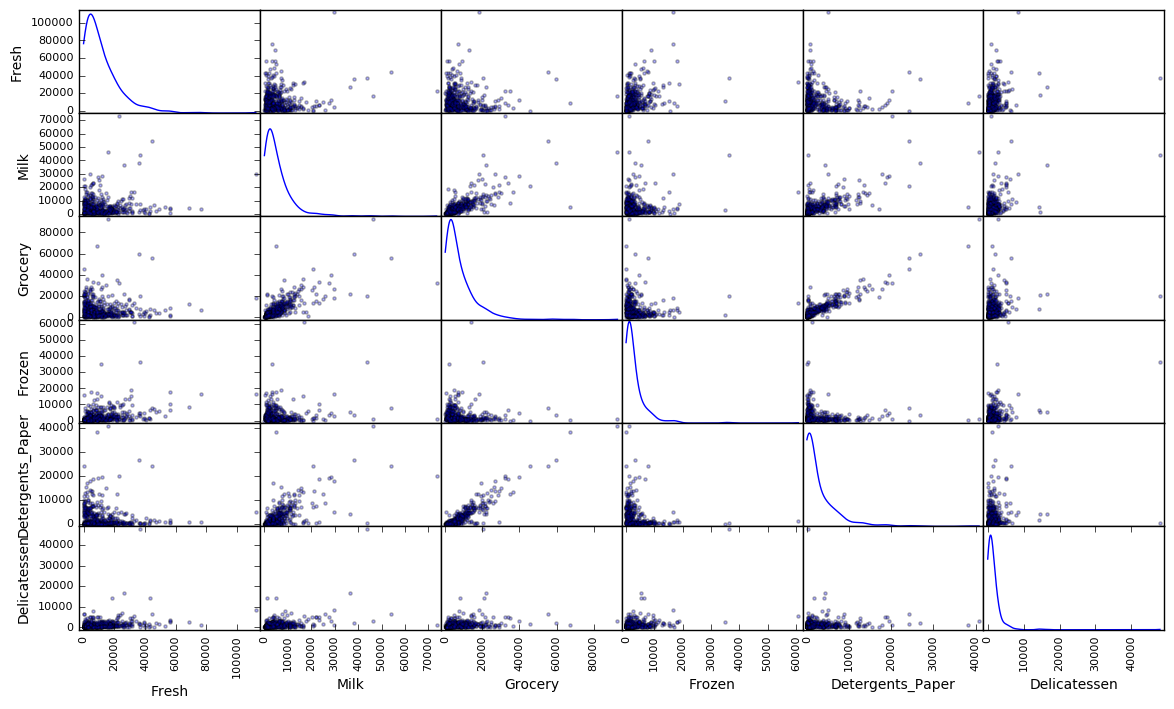

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Looking at the 'Fresh' category, there doesn't seem to be any clear correlation with other product categories. It has a positively skewed unimodal distribution - as well as all the other categories - with data points mostly on the left side. Looking at the graph, there are points though that exhibit positive correlation like Grocery & Detergents_Paper and Milk & Grocery. These two pairs exhibit a degree of correlation. 

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that the results obtained from our analysis are significant and meaningful.

### Implementation: Feature Scaling
If the data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, we implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

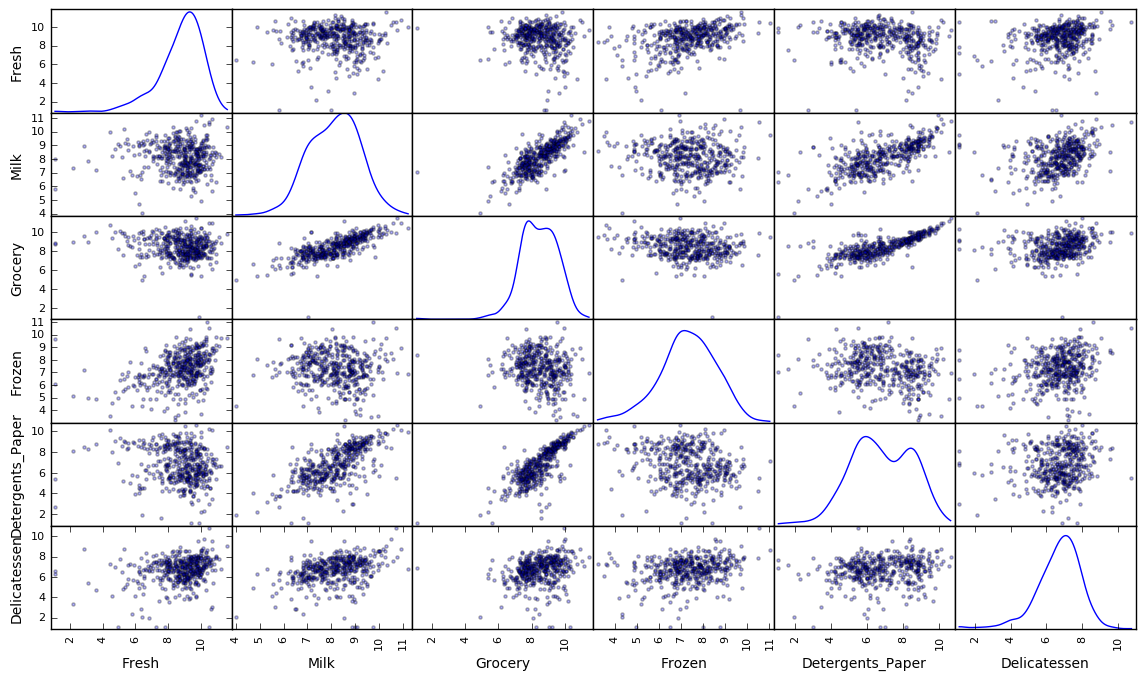

In [12]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature appears much more normal. For any pairs of features identified earlier as being correlated, we can observe here that, that correlation is still present (and even stronger than before).

The code below shows how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, we implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.


In [14]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The data point 65 is an outlier for both 'Fresh' and 'Frozen'  
The data point 66 is an outlier for both 'Fresh' and 'Delicatessen'   
The data point 128 is an outlier for both 'Fresh' and 'Delicatessen'   
The data point 75 is an outlier for both 'Grocery' and 'Detergents_Paper'  
The data point 154 is an outlier for both 'Grocery' and 'Milk'  
<hr>
These 5 data points as well as all the outliers should be removed from the dataset because they can potentially distort the model's output and thereby result to a less-than-reliable model. In the case of clustering, outliers can affect the location of the centroid and even potentially affect the total number of clusters one can have.

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, we implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

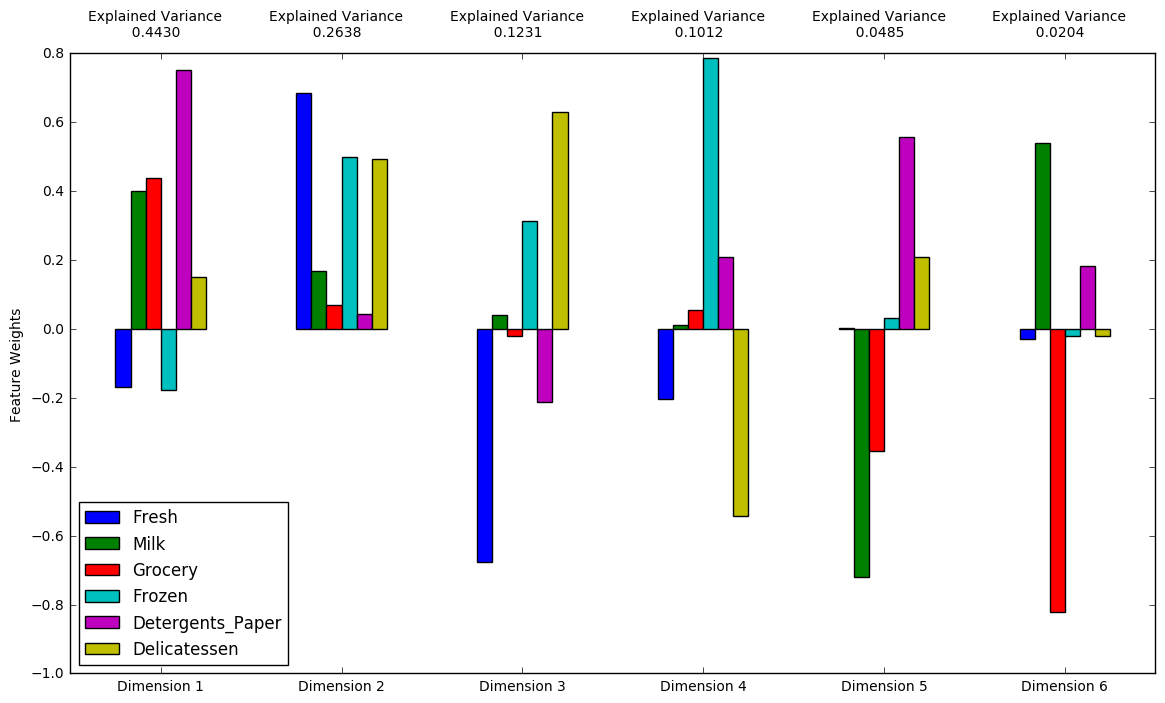

In [15]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)
# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

* In total the first and second principal component explain 71.9% of the data and the first four principal components explain 93.14% of the data.  
* The first principal component is made up of large positive weights in Detergents_Paper, and lesser but still sizeable positive weights on Grocery and Milk. It also correlates with a decrease in Fresh and Frozen. This pattern might represent spending in household staples products that are purchased together.  
* The second principal component is made up of large positive weights in Fresh, smaller but still significant weights in Frozen and Delicatessen. It also shows far smaller but still positive spending patterns in the remaining three categories.  
* The third principal component represents opposite patterns of spending; it shows how customers who buy more in the Fresh category tend not to buy at all in the Delicatessen category; we also see how negatively correlated buying patterns in the Frozen and Detergent_Papers categories can be.   
* The fourth principal component reveals that the more customers buy in the Frozen category, the less they buy in the Fresh and Delicatessen categories; buying patterns in the Frozen category is also a little positively correlated to buying patterns in the Detergents_Paper category even.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8004,0.8698,-0.2128,0.0079,-0.1188,-0.2314
1,2.1974,4.9048,0.0686,0.5623,-0.5195,-0.2369
2,-6.6033,-6.4820,1.2247,-0.7814,0.4625,0.1238


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, we implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca_fit = pca.fit(good_data)
# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
The code below shows how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7887,0.8123
1,2.1899,4.8605
2,-6.6170,-6.5320


## Clustering

In this section, we choose between two clustering algorithms (K-Means and Gaussian Mixture Model) to identify the various customer segments hidden in the data. We then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

* **K-Means clustering: **  
The advantages of using K-Means clustering are its simplicity and its low cost. It is also very fast.

* **Gaussian Mixture Model: **   
The advantages of using th GMM model are: it is more flexible in terms of cluster covariance than k-means, as a result cluster assignment is much more flexible than in k-means. It allows mixed membership of points to clusters whereas in k-means a point can only belong to one cluster.  
* **Selected Algorithm: **  
I will use the Gaussian Mixture Model because of the correlation of the different features of the dataset to each other.

### Implementation: Creating Clusters
Depending on the problem, the number of expected clusters in the data, may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, we implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(random_state = 0)
clusterer = clusterer.fit(reduced_data)
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print ("The silhouette score is thus: {}".format(score)) 

The silhouette score is thus: 0.35099406993457977


In [19]:
range_clusters = [6,5,4,3,2]
for n_clusters in range_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 0)
    preds = clusterer.fit_predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data, preds)
    print ("The score for n_cluster = {0} is {1}".format(n_clusters, score))
    print ("The centers for n_cluster = {0} are {1}".format(n_clusters, centers))
    print ("The sample predictions for n_cluster = {0} are {1}".format(n_clusters, sample_preds))

The score for n_cluster = 6 is 0.3666089873432108
The centers for n_cluster = 6 are [[-0.22135212  2.05653866]
 [-0.21969411 -0.61319476]
 [ 2.6711491  -2.25842836]
 [ 2.46354307  0.76290854]
 [-2.32106509  0.11800241]
 [-1.96122062 -4.00377488]]
The sample predictions for n_cluster = 6 are [3 0 5]
The score for n_cluster = 5 is 0.35099077893126523
The centers for n_cluster = 5 are [[ 2.55451657 -2.41003117]
 [-2.64218703 -0.52461516]
 [-0.34084753 -0.85722602]
 [-0.95448386  1.62649872]
 [ 2.30665683  0.85231133]]
The sample predictions for n_cluster = 5 are [4 4 1]
The score for n_cluster = 4 is 0.3320095826820278
The centers for n_cluster = 4 are [[-0.82134842  1.09640841]
 [ 2.20886092  0.80557387]
 [-2.20878075 -0.84464249]
 [ 2.08549179 -2.24218483]]
The sample predictions for n_cluster = 4 are [1 1 2]
The score for n_cluster = 3 is 0.39689092644980506
The centers for n_cluster = 3 are [[ 1.90807636 -2.0962454 ]
 [-1.74395866 -0.04085513]
 [ 1.59016368  1.23678893]]
The sample pr

### The Best  Silhouette Score 
The score for n_cluster = 2 is 0.419166083203  
The score for n_cluster = 3 is 0.393678525808  
The score for n_cluster = 4 is 0.330229563532  
The score for n_cluster = 5 is 0.343875059474  
The score for n_cluster = 6 is 0.360170736113   
The best silhouette score is obtained with a number of clusters equals to 2

### Cluster Visualization
Once the optimal number of clusters for our clustering algorithm chosen, we can now visualize the results by executing the code block below.

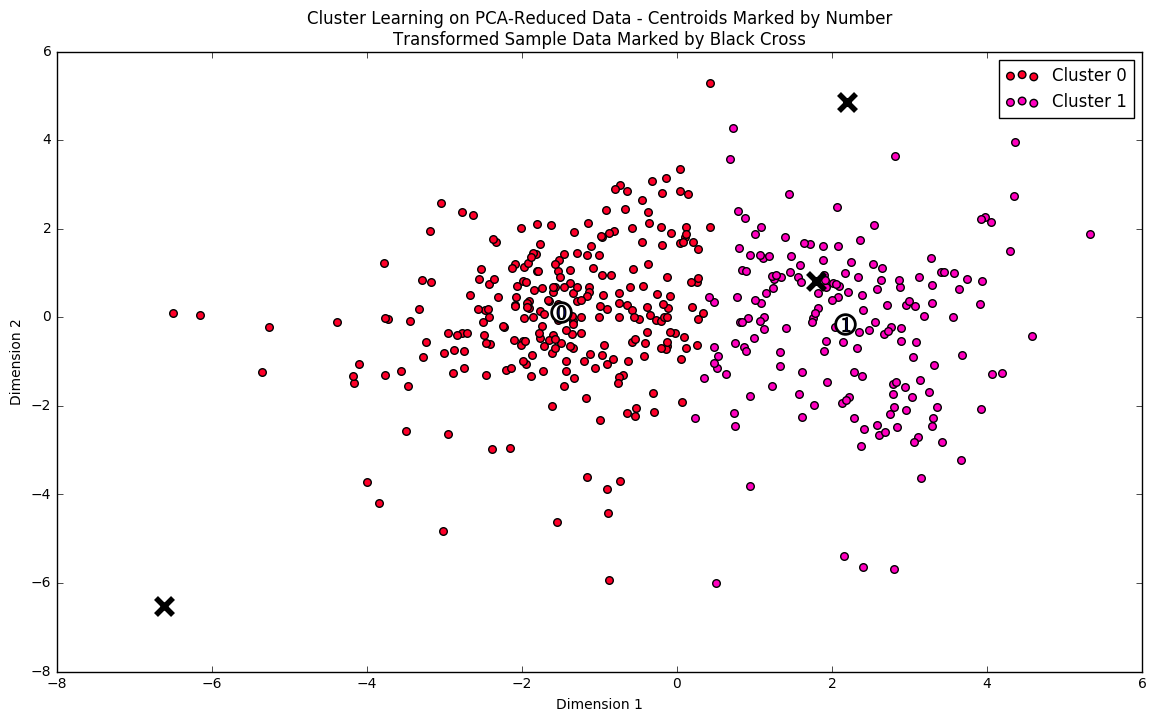

In [20]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, we implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(true_centers - data.mean().round())
display(true_centers - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3133.0,-3899.0,-5474.0,-984.0,-2587.0,-844.0
Segment 1,-7995.0,2104.0,4153.0,-2120.0,1680.0,-489.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,363.0,-1730.0,-2279.0,562.0,-522.0,-285.0
Segment 1,-4499.0,4273.0,7348.0,-574.0,3745.0,70.0


The right side segment or segment 1 has a higher than average value in Milk, Grocery and Detergents_Paper category thus they can represent Grocery stores.  
The left side segment or segment 0 has lower than average values for all categories and higher than the median values for the categories Fresh and Frozen thus they can represent Hotels for instance since.

The code block below prints which cluster each sample point is predicted to be.

In [24]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point {} is predicted to be in Cluster {}".format(i, pred))

Sample point 0 is predicted to be in Cluster 1
Sample point 1 is predicted to be in Cluster 1
Sample point 2 is predicted to be in Cluster 0


In [25]:
display(data.loc[[0,1,2]] - data.mean().round())
display(data.loc[[0,1,2]] - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,669.0,3860.0,-390.0,-2858.0,-207.0,-187.0
1,-4943.0,4014.0,1617.0,-1310.0,412.0,251.0
2,-5647.0,3012.0,-267.0,-667.0,635.0,6319.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4165.0,6029.0,2805.0,-1312.0,1858.0,372.0
1,-1447.0,6183.0,4812.0,236.0,2477.0,810.0
2,-2151.0,5181.0,2928.0,879.0,2700.0,6878.0


* Sample point 1 has values higher than average values in Milk, Grocery, Detergents_Paper and Delicatessen categories so it is  best represented as Grocery Stores on cluster 1 (right cluster).  
* Sample point 0's median values for Milk Grocery and Detergent_Paper are above average and mimic the Cluster 1 center in those categories so it is best represented by Cluster 1 too.  
* As for Sample point 2, its median values for Fresh Grocery and Frozen are below average which is closest to Cluster 0 so Sample 2 is best represented by Cluster 0.  
The predicted clusters seem to be consistent with the category spending of the different samples.


## Conclusion

In this final section, we will investigate ways to make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide additional features about the customer data. Finally, we will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

#### A/B Testing
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively.  
Let's suppose that the wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. How can that be done?  
Well, with A/B Testing! - The wholesale distributor, with the help of the model, can select two identical groups of customers A and B in cluster 1(for instance), change the delivery schedule for group A and see how group A changes compared to group B. He then can do the same thing over again for cluster 0. He would then be able to tell which group of customers his changes affect the most.


<hr>
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
Well, he can use the supervised learner K-Nearest Neighbor to train the original customers the target value being the ***customer segment*** feature. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

The code block below shows how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, the sample points are circled in the plot, which will identify their labeling.

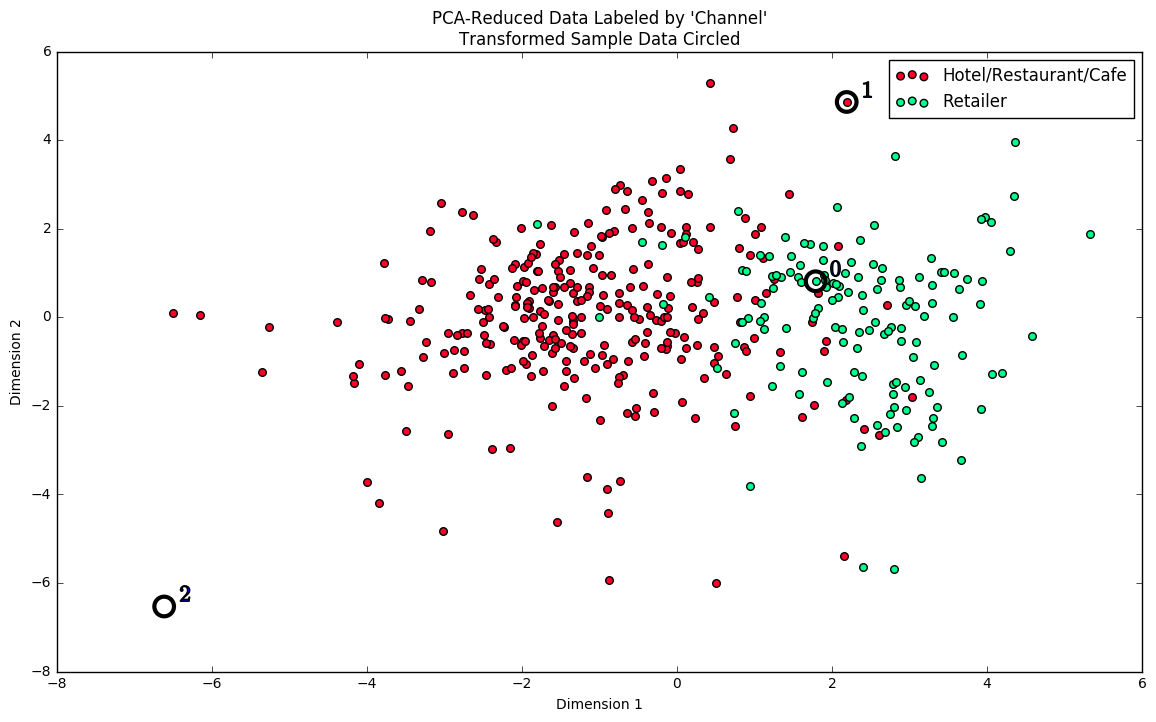

In [26]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

As we can see, the number of clusters is still 2 and the sample points 0 & 1 are still on the right cluster while the sample point 2 is on the left cluster. Also, the sample points 1 & 2 are far away from the centers of their respective clusters.  
Customer segments that can be classified as purely Retailers are those close to the center of the right cluster like Sample point 0 and those classified as purely Hotels/Restaurants/Cafes are those close to the center of the left cluster. These classifications seem to be consistent with our previous predictions as the Sample Points 0 and 1 are still classified in the right cluster and the Sample point 2 is still classified in the left cluster.